# Explore here

In [1]:
# Your code here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# modelado (install scikit-learn)
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

# optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV




archivo="https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"

df_original = pd.read_csv(archivo, sep=",")
df = pd.read_csv(archivo, sep=",")

datos,atributos=df.shape
print(f"tenemos {datos} datos y {atributos} atributos.")
print()

# Valores duplicados

duplicados = df.duplicated()
num_duplicados = duplicados.sum()

print(f"Contamos con {num_duplicados} dato duplicado.")
print()

df_duplicados = df[duplicados]

df_sin_duplicados = df.drop_duplicates()

df=df_sin_duplicados

# Obtener información sobre tipos de datos y valores no nulos
df.info()

tenemos 1338 datos y 7 atributos.

Contamos con 1 dato duplicado.

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


variables categoricas

In [2]:
df.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [3]:
df.smoker.value_counts()


smoker
no     1063
yes     274
Name: count, dtype: int64

In [4]:
df.region.value_counts()


region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

/tmp/ipykernel_787/2949880874.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axis[0].legend(title="Sexo", loc="upper right")
/tmp/ipykernel_787/2949880874.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axis[1].legend(title="Fumador", loc="upper right")
/tmp/ipykernel_787/2949880874.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axis[2].legend(title="Región", loc="upper right")


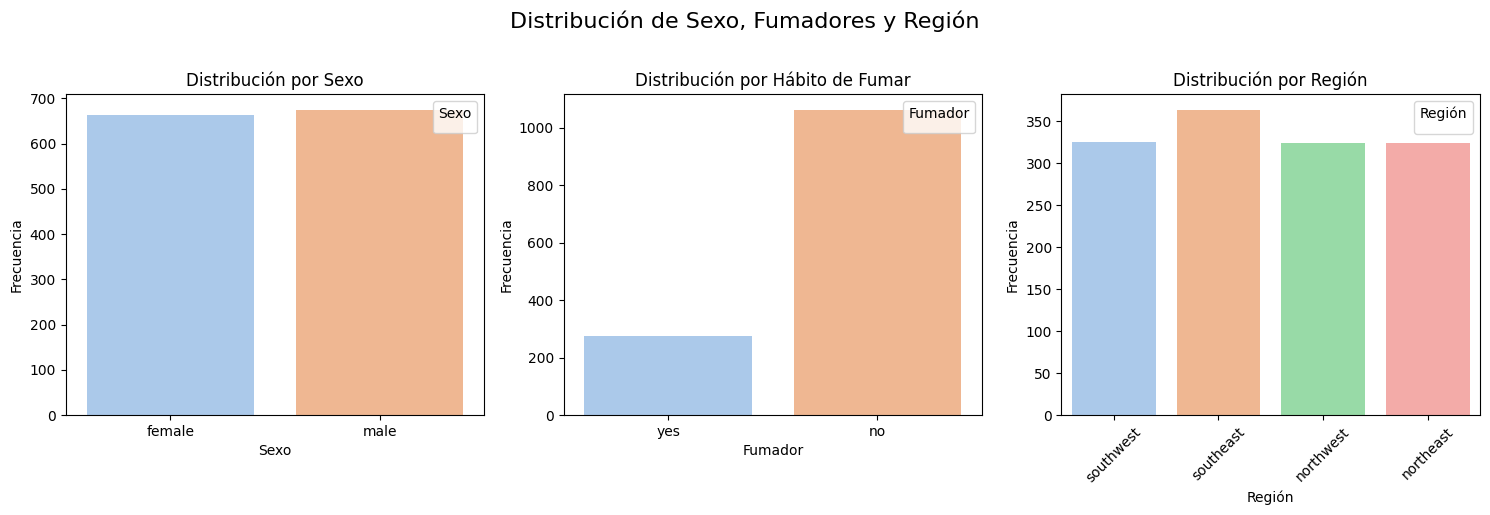

In [26]:

# Crear la figura y los ejes
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico de 'sex'
sns.countplot(ax=axis[0], data=df, x="sex", palette="pastel", hue="sex", dodge=False)
axis[0].set_title("Distribución por Sexo")
axis[0].set_xlabel("Sexo")
axis[0].set_ylabel("Frecuencia")
axis[0].legend(title="Sexo", loc="upper right")

# Gráfico de 'smoker'
sns.countplot(ax=axis[1], data=df, x="smoker", palette="pastel", hue="smoker", dodge=False)
axis[1].set_title("Distribución por Hábito de Fumar")
axis[1].set_xlabel("Fumador")
axis[1].set_ylabel("Frecuencia")
axis[1].legend(title="Fumador", loc="upper right")

# Gráfico de 'region'
sns.countplot(ax=axis[2], data=df, x="region", palette="pastel", hue="region", dodge=False)
axis[2].set_title("Distribución por Región")
axis[2].set_xlabel("Región")
axis[2].set_ylabel("Frecuencia")
axis[2].legend(title="Región", loc="upper right")
axis[2].tick_params(axis="x", rotation=45)  # Rotar etiquetas para mejor lectura

# Ajustar el diseño
plt.suptitle("Distribución de Sexo, Fumadores y Región", fontsize=16, y=1.02)  # Título global
plt.tight_layout()

# Mostrar el plot
plt.show()


se ve claramente que la mayoria son no fumadores

variables numericas

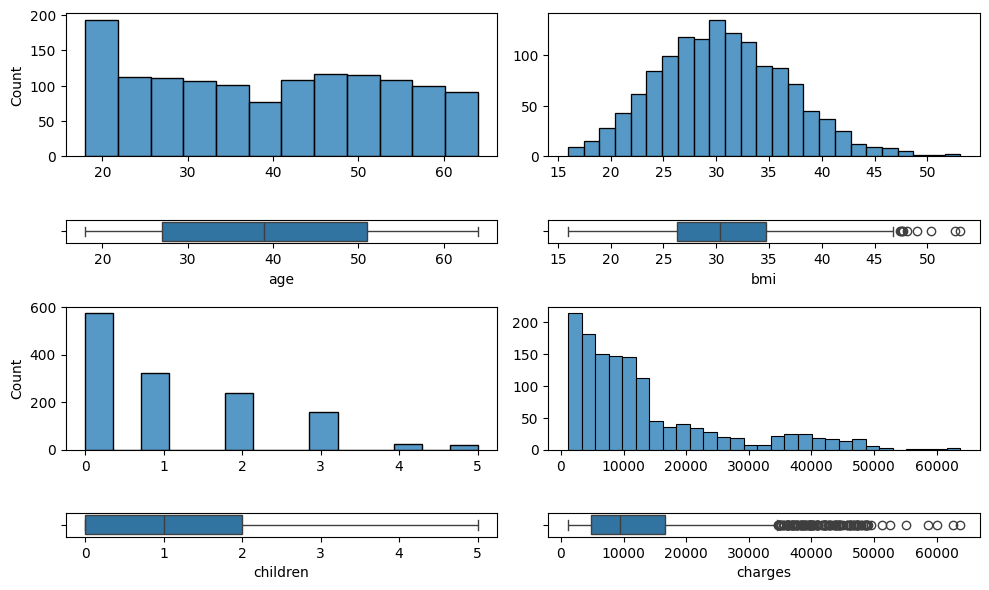

In [6]:
fig, axis = plt.subplots(4, 2, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")

sns.histplot(ax = axis[0, 1], data = df, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "bmi")

sns.histplot(ax = axis[2, 0], data = df, x = "children").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "children")

sns.histplot(ax = axis[2, 1], data = df, x = "charges").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "charges")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

-Hay aproximadamente el doble de clientes que rondan los 20 años con respecto al resto(30,40,50,y 60), que se distribuyen de manera similar.

-El índice de masa corporal tiene una distribución normal, con una media 30 aproximadamente.

-La mayoría de los clientes no tienen hijos con cobertura medica, y va decreciendo la cantidad hasta que llegan a unos pocos clientes que tienen entre 4 o 5 hijos con cobertura.

-En general los clientes tienen a contratar un seguro médico con una prima baja.podemos ver que a mayor valor menos contratados, lo que es algo logico por eso se toma los valores


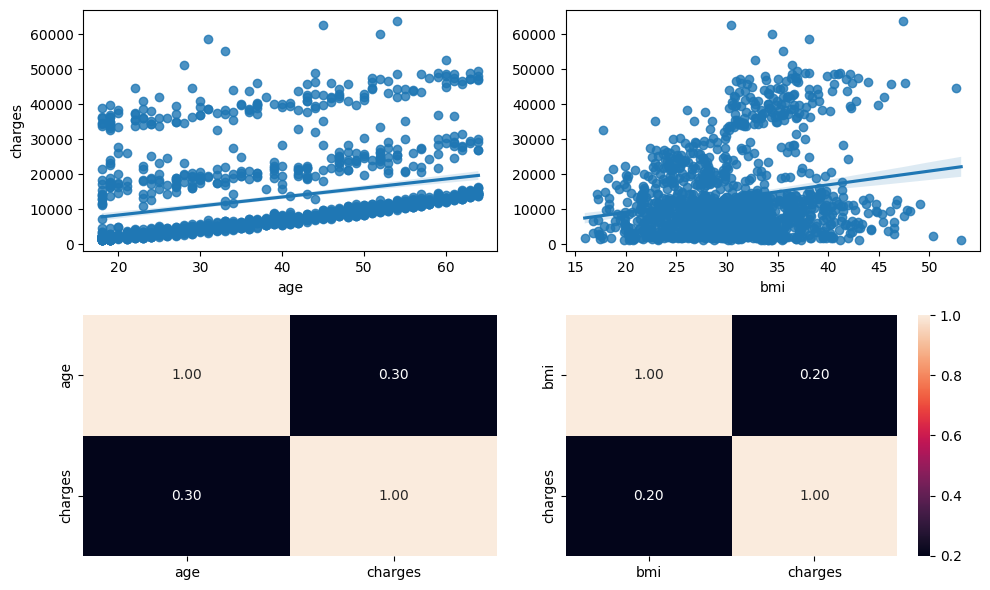

In [7]:
fig, axis = plt.subplots(2, 2, figsize = (10, 6))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "charges")
sns.heatmap(df[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "bmi", y = "charges").set(ylabel=None)
sns.heatmap(df[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

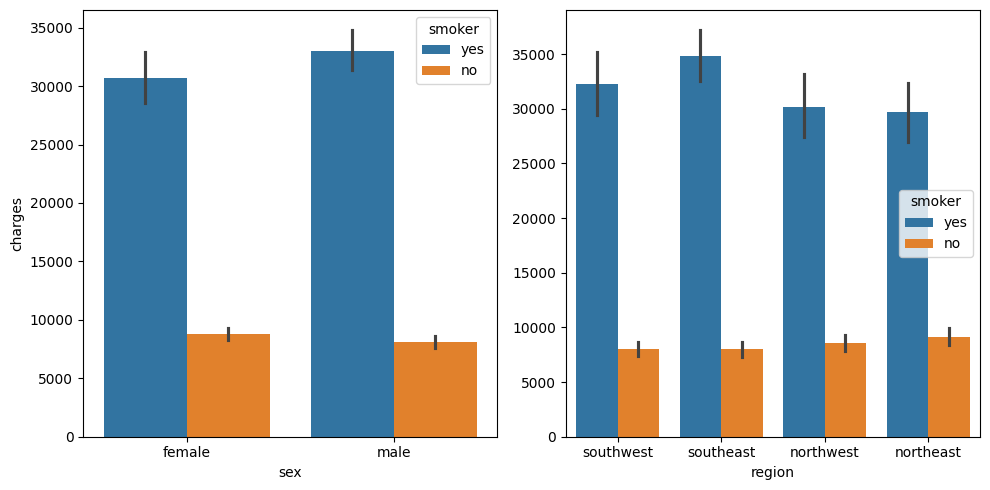

In [8]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

# Calcular la proporción de supervivencia por clase y sexo
sns.barplot(ax = axis[0], data = df, x = "sex", y = "charges", hue = "smoker")
# Calcular la proporción de supervivencia por puerto y sexo
sns.barplot(ax = axis[1], data = df, x = "region", y = "charges", hue = "smoker").set(ylabel = None)

plt.tight_layout()

plt.show()

fumadores y no fumadores estan distribuidos de una manera similar

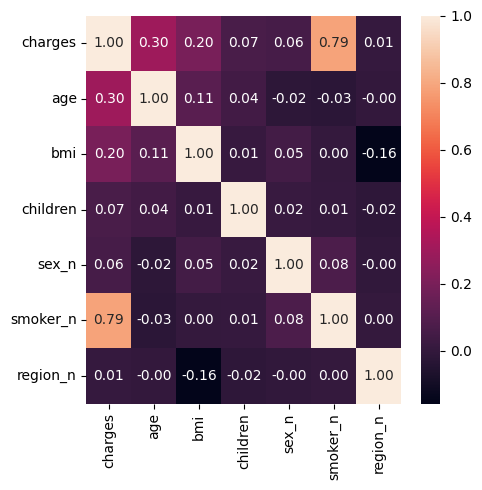

In [9]:
# Factorizando variables categóricas.

df["sex_n"] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]
df["smoker_n"] = df["smoker_n"].map({0: 1, 1: 0})  # Invertir el mapeo 
df["region_n"] = pd.factorize(df["region"])[0]
fig, axis = plt.subplots(figsize = (5, 5))

sns.heatmap(df[["charges", "age", "bmi", "children", "sex_n","smoker_n", "region_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

hay una correlacion entre fumadores y prima del seguro medico (0.79)

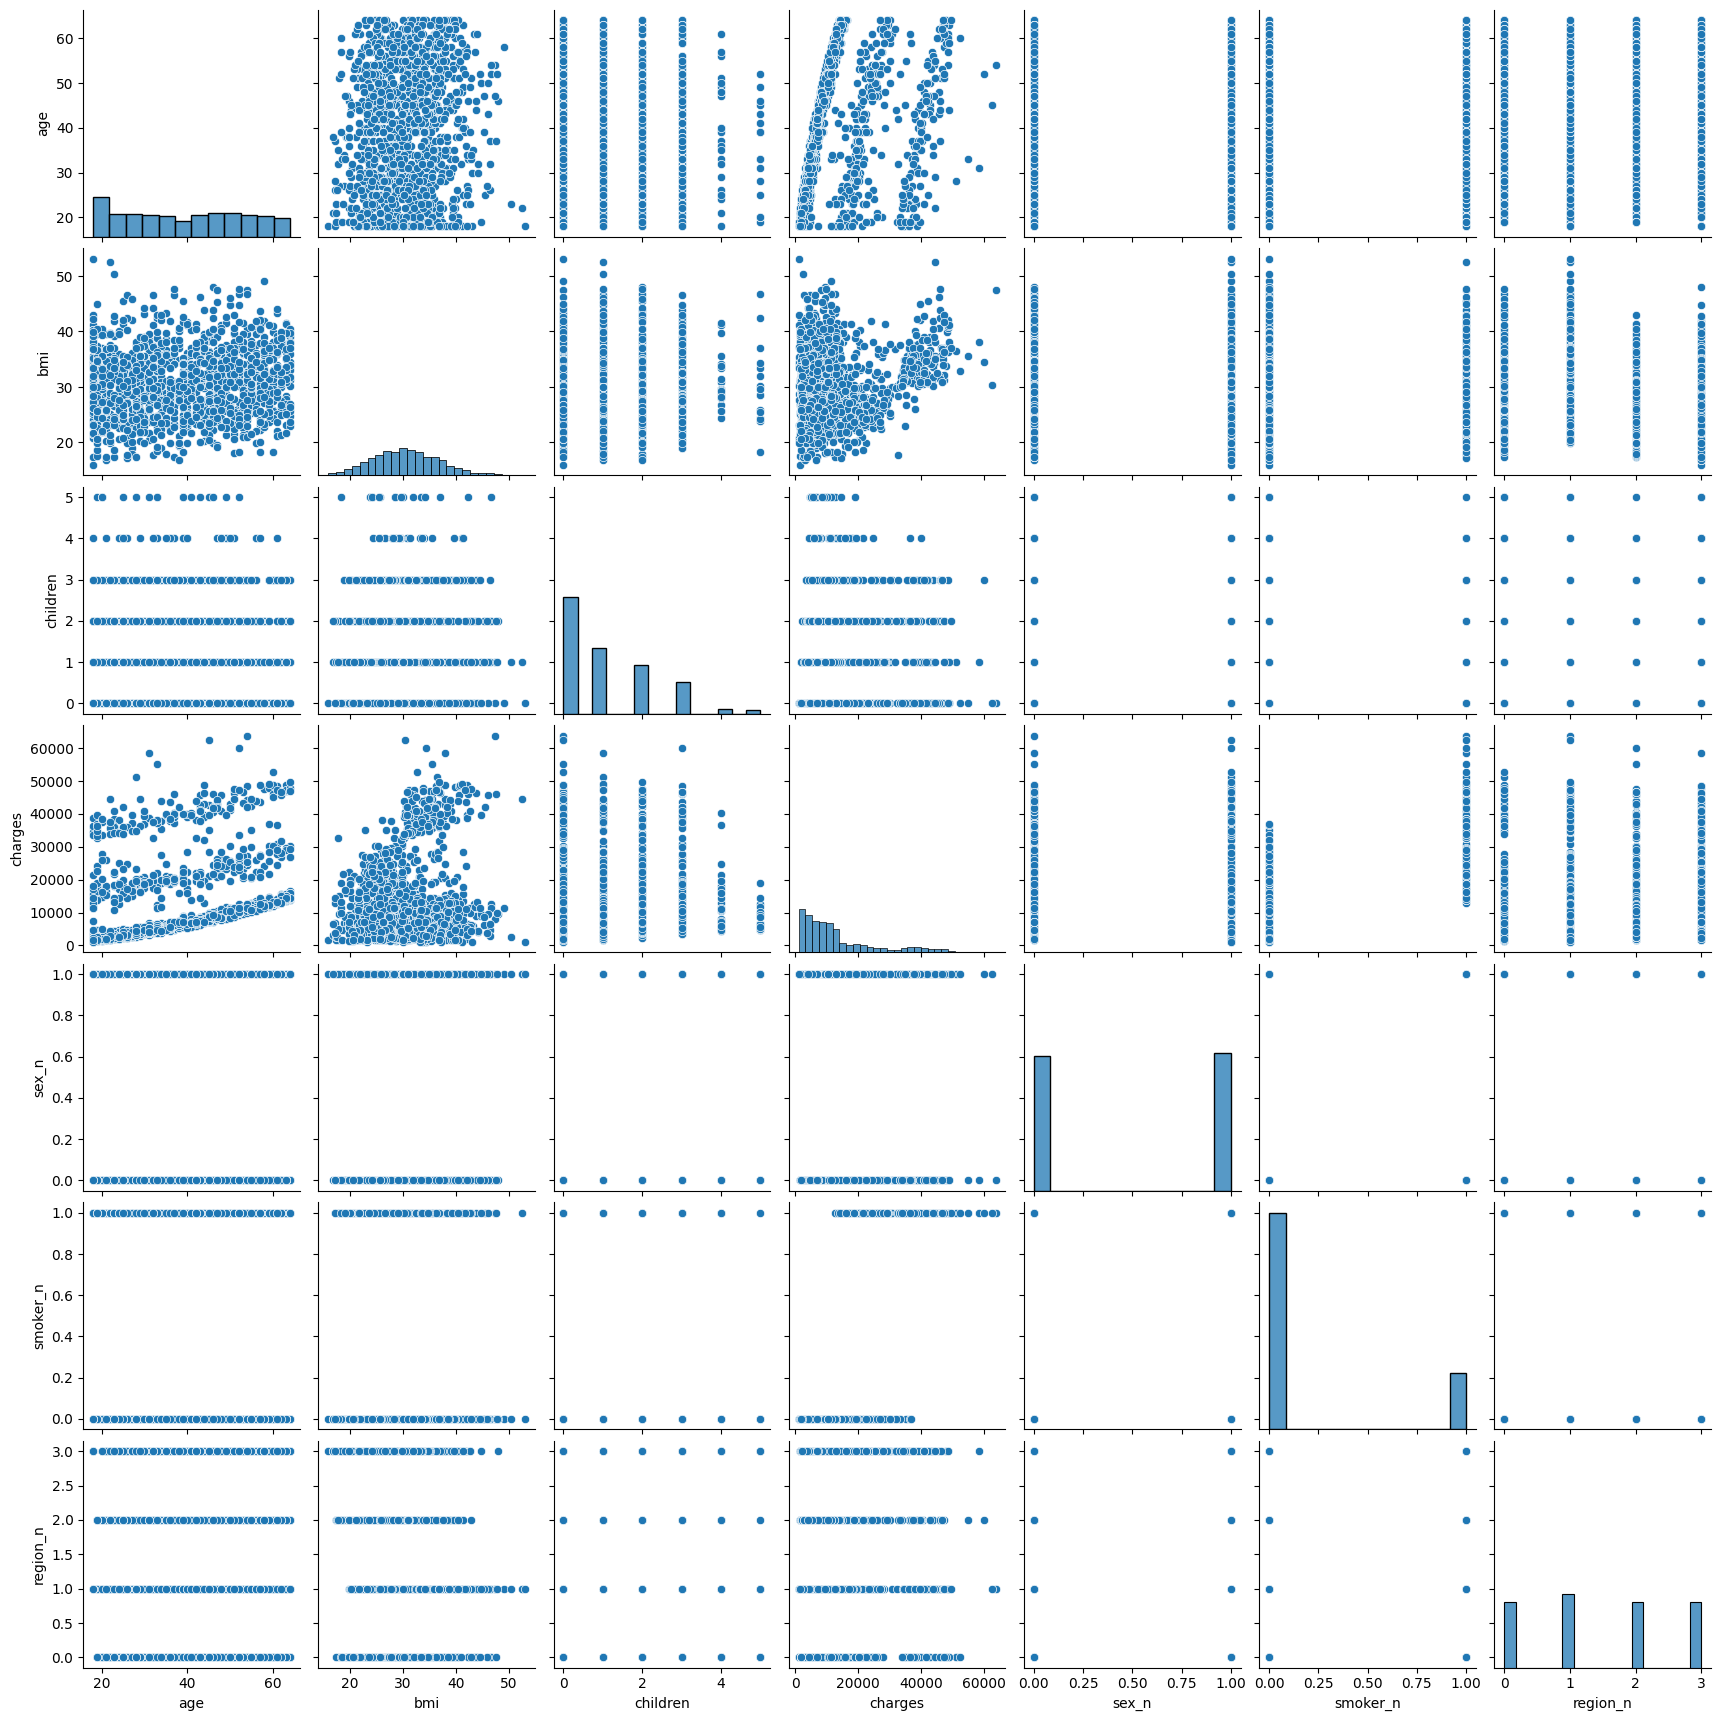

In [10]:
# relacionar todos con todos
sns.pairplot(data = df)

comenzamos a analizar los valores atipicos

In [11]:
df.describe()


,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.204936,1.483919
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,1.105208
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,0.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,0.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,0.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


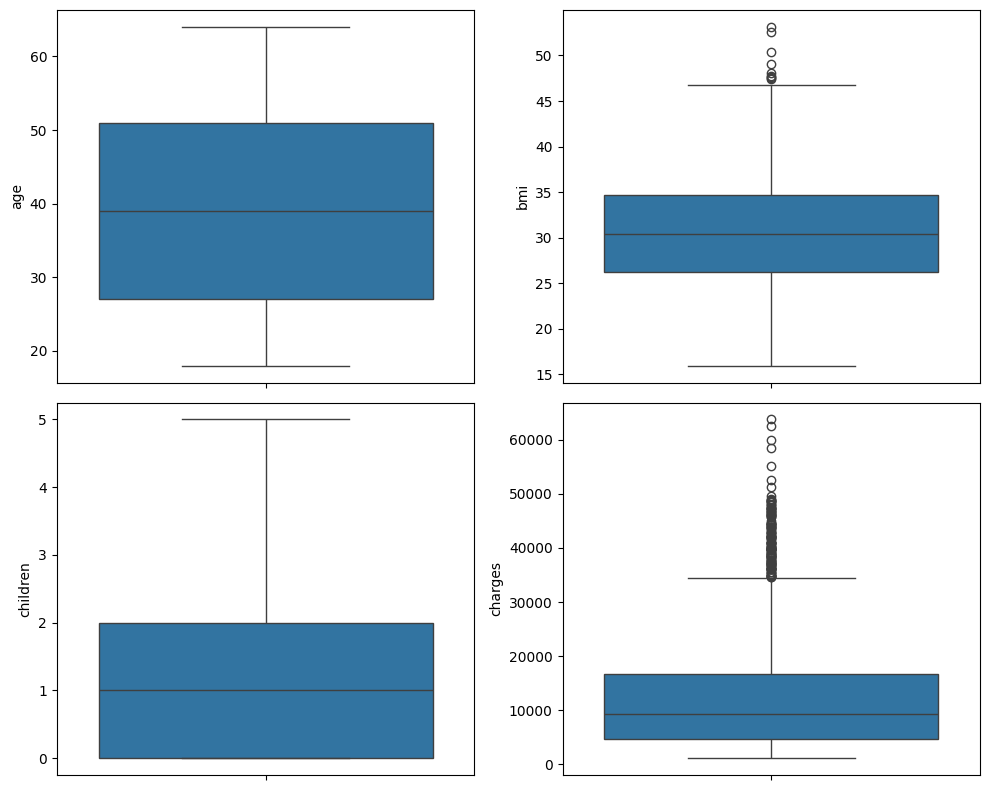

In [12]:
fig, axis = plt.subplots(2, 2, figsize = (10, 8))

sns.boxplot(ax = axis[0, 0], data = df, y = "age")
sns.boxplot(ax = axis[0, 1], data = df, y = "bmi")
sns.boxplot(ax = axis[1, 0], data = df, y = "children")
sns.boxplot(ax = axis[1, 1], data = df, y = "charges")


plt.tight_layout()

plt.show()

hay valores atipicos en bmi y charges. Los valores de bmi maximo y la media no son lejanos por eso que no eliminamos estos valores atipicos

In [13]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) de charges
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 34524.78 y -13120.72, con un rango intercuartílico de 11911.37


In [14]:
#charges
prima_seguro_medico_altas = df[df["charges"] >= 34524.78]

prima_seguro_medico_altas

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
14,27,male,42.130,0,yes,southeast,39611.75770,1,1,1
19,30,male,35.300,0,yes,southwest,36837.46700,1,1,0
23,34,female,31.920,1,yes,northeast,37701.87680,0,1,3
29,31,male,36.300,2,yes,southwest,38711.00000,1,1,0
30,22,male,35.600,0,yes,southwest,35585.57600,1,1,0
...,...,...,...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309,1,1,1
1301,62,male,30.875,3,yes,northwest,46718.16325,1,1,2
1303,43,male,27.800,0,yes,southwest,37829.72420,1,1,0
1313,19,female,34.700,2,yes,southwest,36397.57600,0,1,0


no hay valores inusuales ya que es posible que alguien pague mas dinero para tener una mejor cobetura

In [15]:
#faltantes
df.isnull().sum().sort_values(ascending=False)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

Separacion para train y test (variable objetivo: "charges")

In [16]:
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,sex,bmi,children,smoker,region,sex_n,smoker_n,region_n
1114,23,male,24.510,0,no,northeast,1,0,3
968,21,male,25.745,2,no,northeast,1,0,3
599,52,female,37.525,2,no,northwest,0,0,2
170,63,male,41.470,0,no,southeast,1,0,1
275,47,female,26.600,2,no,northeast,0,0,3


In [17]:
num_variables = ["age", "bmi", "children"]


# instancio el escalador
scaler = MinMaxScaler()

# entreno el escalador con los datos de entrenamiento
scaler.fit(X_train[num_variables])

# aplico el escalador en ambos

X_train_num_mm = scaler.transform(X_train[num_variables])
X_train_num_mm = pd.DataFrame(X_train_num_mm, index = X_train.index, columns = num_variables)

X_test_num_mm = scaler.transform(X_test[num_variables])
X_test_num_mm = pd.DataFrame(X_test_num_mm, index = X_test.index, columns = num_variables)

X_train_num_mm.head()


,age,bmi,children
1114,0.108696,0.230024,0.0
968,0.065217,0.263250,0.4
599,0.739130,0.580172,0.4
170,0.978261,0.686306,0.0
275,0.630435,0.286252,0.4


In [18]:
cat_variables = ["sex","smoker","region"]

# instancio el encoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# entreno el encoder con los datos de entrenamiento
onehot_encoder.fit(X_train[cat_variables])

# aplico el encoder en amhos
X_train_cat_ohe = onehot_encoder.transform(X_train[cat_variables])
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe, index = X_train.index, columns=onehot_encoder.get_feature_names_out(cat_variables))

X_test_cat_ohe = onehot_encoder.transform(X_test[cat_variables])
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe, index = X_test.index, columns=onehot_encoder.get_feature_names_out(cat_variables))

X_train_cat_ohe.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1114,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
968,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
599,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
170,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
275,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [19]:
#unificacion varibles
X_train_final = pd.concat([X_train_num_mm, X_train_cat_ohe], axis=1)
X_test_final = pd.concat([X_test_num_mm, X_test_cat_ohe], axis=1)

X_train_final.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1114,0.108696,0.230024,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
968,0.065217,0.263250,0.4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
599,0.739130,0.580172,0.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
170,0.978261,0.686306,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
275,0.630435,0.286252,0.4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [20]:
model = LinearRegression()

model.fit(X_train_final, y_train)

LinearRegression()

In [21]:
# Parámetros:

print(f"Intercepto (b0): {model.intercept_}")
print(f"Coeficientes: {model.coef_}")

Intercepto (b0): 9477.271729621214
Coeficientes: [ 11417.69313034  11846.1325602    2665.04994399     50.771027
    -50.771027   -11538.88229643  11538.88229643    472.45520552
     80.69375073   -366.46441021   -186.68454604]


In [22]:
y_pred = model.predict(X_test_final)
y_pred

array([ 8.14369388e+03,  5.73711568e+03,  1.43693149e+04,  3.17455136e+04,
        8.96238666e+03,  1.31497224e+04,  3.04467607e+04,  1.45328881e+03,
        1.06330184e+04,  1.13189438e+04,  1.03778536e+04,  3.31184377e+04,
        3.10772527e+04,  1.74119253e+04,  1.08016743e+04,  9.52889964e+03,
        4.16103784e+03,  3.17315373e+04,  3.21938875e+03,  5.22992460e+03,
        3.54979004e+03,  3.02837740e+04,  1.48989509e+04,  3.04569093e+04,
        3.11077668e+04,  5.51196081e+03,  3.55030401e+04,  3.65704810e+04,
        1.14123133e+04,  1.42056990e+04,  6.50234029e+03,  1.27246945e+04,
        3.99806590e+02,  1.20883980e+04,  3.96592069e+04,  1.23395540e+04,
        4.74412279e+03,  3.91903157e+03,  3.08606789e+04,  8.95870663e+03,
        7.05389441e+03,  3.01125636e+04,  3.47804324e+04,  1.22916189e+04,
        7.35739310e+03,  3.42060530e+03,  6.21243471e+03,  8.98345200e+03,
        4.26401828e+03,  9.01992870e+03,  6.60149578e+03,  1.20802337e+04,
        3.12447687e+04,  

In [23]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 35478020.67523556
Coeficiente de determinación: 0.8069287081198014


Por la falta de hiperparametros no podemos mejorar la predicion

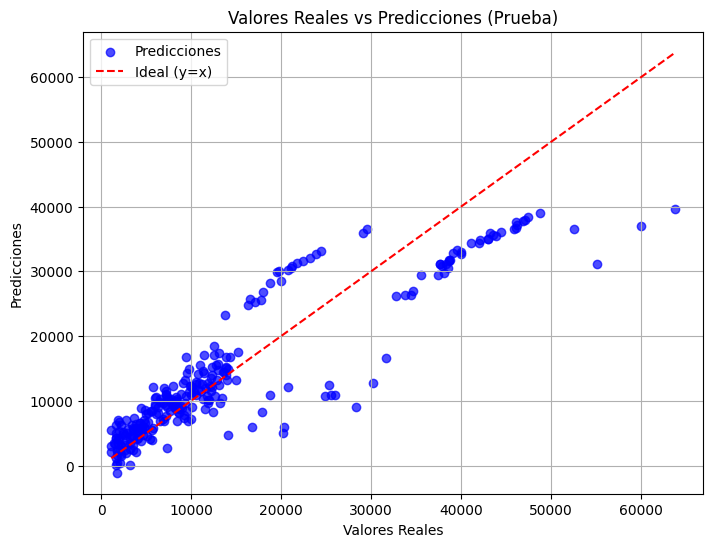

In [24]:
# Gráfico para el conjunto de prueba
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue", label="Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label="Ideal (y=x)")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs Predicciones (Prueba)")
plt.legend()
plt.grid()
plt.show()

podenos observar en el grafico que los tienen una prima menor a 15000 los predice mejor que a los que tienen una prima mayor

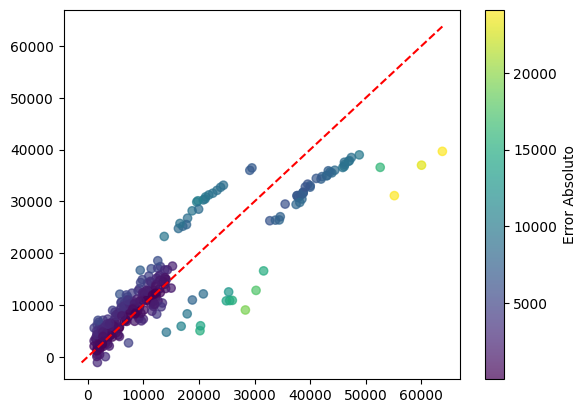

In [29]:

from matplotlib.colors import Normalize

cmap = plt.cm.viridis
norm = Normalize()

plt.scatter(y_test, y_pred, c=np.abs(y_test - y_pred), cmap=cmap, norm=norm, alpha=0.7)
plt.colorbar(label="Error Absoluto")
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, '--r', label="Ideal (y=x)")


por ultimo dejo un grafico mejorado en donde vemos el error con su respectiva escala.